In [1]:
import sys
import os
import re
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

%matplotlib inline

In [90]:
# Returns a list of sugar counts if the country is in the tag
def return_sugars(df, country):
    sugar_index = df.columns.get_loc('sugars_100g')
    country_index = df.columns.get_loc('countries_tags')
    return [row[sugar_index] for index, row in df.iterrows() if country in row[country_index]]

def return_category_tags(df, country):
    product_index = df.columns.get_loc('categories_en')
    country_index = df.columns.get_loc('countries_tags')
    return [row[product_index] for index, row in df.iterrows() if country in row[country_index]]

def parse_category(list_of_category):
    categorized_dict = defaultdict(int)
    for category_list in list_of_category:
        for category in str(category_list).split(","):
            categorized_dict[category] += 1
    return categorized_dict

def condense_food_dictionary(raw_dict):
    pass
    

In [3]:
# Just the data reading step. I check if the path for the file exist, and if so, ready the data from the file
data_directory = os.getcwd()
data_path = 'data\world-food-facts\FoodFacts.csv'
data_path = os.path.join(data_directory, data_path)

if os.path.exists(data_path): 
    world_food_facts = pd.read_csv(data_path)
    world_food_facts.countries = world_food_facts.countries.str.lower()
    print("Data loaded. There are {} rows".format(world_food_facts.shape[0]))
else:
    print("Error: source data location: {} does not exist".format(data_path))

Data loaded. There are 65503 rows


C:\Users\dsharp\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (0,3,5,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# For my approach, I need to remove the rows where the countries_tags and sugars_100g are null
worlds_sugars = world_food_facts[(world_food_facts.countries_tags.notnull() & world_food_facts.sugars_100g.notnull())]
"After removing rows where countries_tags and sugars_100g columns are null, there are {} rows".format(len(worlds_sugars))

'After removing rows where countries_tags and sugars_100g columns are null, there are 32611 rows'

In [24]:
country_tags = []
for index, item in worlds_sugars.iterrows():
    if len(item.countries_tags.split(",")) > 1:
        for country in (item.countries_tags.split(",")):
            if ":" in country and country.split(":")[1] not in country_tags:
                country_tags.append(country.split(":")[1])
    else:
        if ":" in country and country.split(":")[1] not in country_tags:
            country_tags.append(country.split(":")[1])

In [25]:
country_tags[:5]

['hong-kong', 'france', 'united-kingdom', 'united-states', 'australia']

In [26]:
len(set(country_tags))

69

In [27]:
num = return_sugars(worlds_sugars, '日本')
print(len(num))
np.mean(return_sugars(worlds_sugars, '日本'))

1


0.0

In [32]:
worlds = world_food_facts[world_food_facts.countries_tags.notnull()]

In [33]:
sugar_mean_dic = {}
for country in country_tags:
    print("looking for country: {}".format(country))
    sugar = return_sugars(worlds_sugars, country)
    if len(sugar) > 9:
        sugar_mean_dic[country] = np.mean(sugar)

looking for country: hong-kong
looking for country: france
looking for country: united-kingdom
looking for country: united-states
looking for country: australia
looking for country: new-zealand
looking for country: singapore
looking for country: thailand
looking for country: denmark
looking for country: spain
looking for country: canada
looking for country: quebec
looking for country: czech-republic
looking for country: indonesia
looking for country: italy
looking for country: french-guiana
looking for country: switzerland
looking for country: belgium
looking for country: philippines
looking for country: europe
looking for country: lithuania
looking for country: portugal
looking for country: germany
looking for country: netherlands
looking for country: austria
looking for country: romania
looking for country: scotland
looking for country: morocco
looking for country: ireland
looking for country: guadeloupe
looking for country: monaco
looking for country: reunion
looking for country: lu

In [34]:
sugar_mean_dic.keys()

dict_keys(['austria', 'czech-republic', 'netherlands', 'europe', 'portugal', 'quebec', 'belgium', 'tunisia', 'australia', 'reunion', 'hong-kong', 'united-kingdom', 'greece', 'thailand', 'denmark', 'romania', 'poland', 'canada', 'french-guiana', 'italy', 'united-states', 'spain', 'france', 'luxembourg', 'guadeloupe', 'saint-pierre-and-miquelon', 'sweden', 'new-zealand', 'switzerland', 'germany', 'martinique'])

In [35]:
sugar_mean_sorted_list = sorted(sugar_mean_dic.items(), key=operator.itemgetter(1))

In [36]:
sugar_mean_sorted_list.reverse()

In [37]:
for country in sugar_mean_sorted_list[:2]:
    print(country[0])

tunisia
quebec


In [38]:
country_list = [pair[0] for pair in sugar_mean_sorted_list]
sugar_list = [pair[1] for pair in sugar_mean_sorted_list]

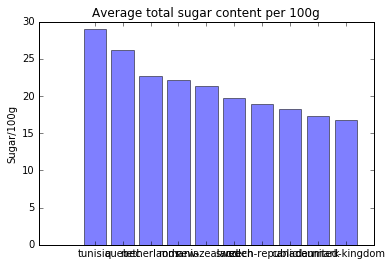

In [79]:
y_pos = np.arange((len(country_list[:10])))
plt.bar(y_pos, sugar_list[:10], align='center', alpha=0.5)
plt.title('Average total sugar content per 100g')
plt.xticks(y_pos, country_list[:10])
plt.ylabel('Sugar/100g')
plt.show()

In [40]:
country_list[0]

'tunisia'

In [44]:
country_products = return_category_tags(worlds_sugars, country_list[0])

In [42]:
country_list[0]

'tunisia'

In [66]:
from collections import defaultdict

type_dic = defaultdict(int)
for product in country_products:
    for type in str(product).split(","):
        type_dic[type] += 1
    

In [68]:
country_product = []
for country in country_list:
    country_product.append(return_category_tags(worlds_sugars, country))

In [71]:
all_type_dic = defaultdict(int)
for product_list in country_product:
    for product in product_list:
        for type in str(product).split(","):
            all_type_dic[type] += 1

In [87]:
us_category_list = return_category_tags(worlds_sugars, country_list[10])

In [92]:
parsed_us_dict = parse_category(us_category_list)

In [93]:
a = sorted(all_type_dic.items(), key=operator.itemgetter(1), reverse=True)

In [96]:
for item in parsed_us_dict.items():
    print(item)

('Pasta sauces', 19)
('Corn flakes', 4)
('Fruit-and-nut-mix', 1)
('Syrups', 10)
('Meats', 21)
('Green curry pastes', 1)
('Kombucha', 1)
('Trail-mix', 1)
('Cereal flakes', 12)
('Canned foods', 30)
('Pizzas-surgelees', 1)
('Fruits and vegetables based foods', 26)
('Salad dressings', 16)
('Pastas', 37)
('Vegetable juices', 6)
('Peanuts', 1)
('Plant-based foods and beverages', 223)
('Canned sardines', 2)
('Protein bars', 3)
('Balsamic-vinaigrette', 1)
('Chia', 1)
('Animal fats', 1)
('Canned-precooked-meat', 3)
('Balsamic-vinaigrette-dressing', 1)
('Diet-colas', 1)
('Noodles', 22)
('Corn oils', 1)
('The-original-ranch', 1)
('Prepared meats', 11)
('Fruit-based beverages', 29)
('Toppings', 1)
('Spreads', 40)
('Balsamic-vinegar-of-modena', 1)
('Honeys', 5)
('Salty snacks', 65)
('Mueslis', 4)
('Peanut-butter-and-chocolat-chip-cereal-bar', 1)
('White chocolates', 2)
('fr:Nouilles-asiatiques', 1)
('Italian-dressing', 1)
('Crisps', 18)
('Bonbons', 4)
('Frozen pizzas', 7)
('Dairies', 106)
('Goat ch